In [722]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import ceil
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

## Import  Data

In [723]:
df = pd.read_csv("train_data.csv")

C:\Users\ritae\AppData\Local\Temp\ipykernel_21144\3930997622.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_data.csv")


## Explore Data

In [724]:
df

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.00,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,...,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### We observed the existence of rows with a large proportion of NaN values that we need to investigate.

In [725]:
df.shape

(593471, 33)

In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

####  Dtypes Notes

- The 'Attorney/Representative' variable is likely a boolean, similar to 'Alternative Dispute Resolution', 'Agreement Reached', 'COVID-19 Indicator' and 'WCB Decision'. Therefore, we will investigate further.
- 'Age at Injury' and 'Birth Year' should not be float types, as age and year of birth are represented by integers, just like the 'Number of Dependents' variable. 
- 'Accident Date', 'Assembly Date', 'C-2 Date', and 'C-3 Date' do not make sense as objects and should be converted to 'datetime'.

In [727]:
# List of date columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']

# Convert each column in date_columns to datetime format
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # errors='coerce' converts invalid parsing to NaT

In [728]:
df['Age at Injury'] = df['Age at Injury'].astype('Int64')
df['Birth Year'] = df['Birth Year'].astype('Int64')
df['Number of Dependents'] = df['Number of Dependents'].astype('Int64')

In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Accident Date                       570337 non-null  datetime64[ns]
 1   Age at Injury                       574026 non-null  Int64         
 2   Alternative Dispute Resolution      574026 non-null  object        
 3   Assembly Date                       593471 non-null  datetime64[ns]
 4   Attorney/Representative             574026 non-null  object        
 5   Average Weekly Wage                 545375 non-null  float64       
 6   Birth Year                          544948 non-null  Int64         
 7   C-2 Date                            559466 non-null  datetime64[ns]
 8   C-3 Date                            187245 non-null  datetime64[ns]
 9   Carrier Name                        574026 non-null  object        
 10  Carrier 

#### We can discard the 'OIICS Nature of Injury Description' variable once as no values.

In [730]:
df = df.drop(columns=['OIICS Nature of Injury Description'])

#### Let´s investigate the NaN values

In [731]:
df.isna().sum()

Accident Date                         23134
Age at Injury                         19445
Alternative Dispute Resolution        19445
Assembly Date                             0
Attorney/Representative               19445
Average Weekly Wage                   48096
Birth Year                            48523
C-2 Date                              34005
C-3 Date                             406226
Carrier Name                          19445
Carrier Type                          19445
Claim Identifier                          0
Claim Injury Type                     19445
County of Injury                      19445
COVID-19 Indicator                    19445
District Name                         19445
First Hearing Date                   442673
Gender                                19445
IME-4 Count                          460668
Industry Code                         29403
Industry Code Description             29403
Medical Fee Region                    19445
WCIO Cause of Injury Code       

In [732]:
# Set the percentage of NaN values to consider a row as "problematic"
percentage_limit = 0.5  # 50%

# Count the number of NaN values in each row
nan_count = df.isna().sum(axis=1)

# Define the absolute threshold based on the percentage limit
absolute_limit = percentage_limit * df.shape[1]

# Filter rows with many NaN values
rows_with_many_nans = df[nan_count > absolute_limit]

rows_with_many_nans

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
3,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
33,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
37,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
42,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
51,NaT,<NA>,NaN,2020-01-01,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593465,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593466,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593468,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
593469,NaT,<NA>,NaN,2022-12-31,NaN,NaN,<NA>,NaT,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [733]:
df.shape

(593471, 32)

In [734]:
# Calculate the proportion of problematic rows
proportion_problematic_rows = len(rows_with_many_nans) / len(df) * 100
print(f"Proportion of rows with many NaN values: {proportion_problematic_rows:.2f}%")

# Drop problematic rows directly from the original DataFrame
df.drop(rows_with_many_nans.index, inplace=True)

Proportion of rows with many NaN values: 3.28%


In [735]:
df.shape

(574026, 32)

#### Since a percentage of ~3% of problematic rows is low and we do not lose a significant amount of data by removing them, we eliminate these rows.

In [736]:
df.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Identifier                          0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code       

In [737]:
df.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.0,5.453750e+05,544948.0,5.740260e+05,132803.000000,564068.000000,558386.000000,558369.000000,556944.000000,574026.000000,574026.0
mean,42.11427,4.910883e+02,1886.767604,5.778956e+06,3.207337,58.645305,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,2.223082e+05,2.832303,19.644175,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.0,0.000000e+00,0.0,5.393066e+06,1.000000,11.000000,1.000000,1.000000,-9.000000,0.000000,0.0
25%,31.0,0.000000e+00,1965.0,5.586764e+06,1.000000,45.000000,31.000000,16.000000,33.000000,0.000000,1.0
50%,42.0,0.000000e+00,1977.0,5.778282e+06,2.000000,61.000000,56.000000,49.000000,38.000000,0.000000,3.0
75%,54.0,8.410000e+02,1989.0,5.971329e+06,4.000000,71.000000,75.000000,52.000000,53.000000,0.000000,5.0
max,117.0,2.828079e+06,2018.0,6.165685e+06,73.000000,92.000000,99.000000,91.000000,99.000000,1.000000,6.0


- We can see that there are issues with the 'Age at Injury' variable, as it is impossible for someone to be 0 or 117 years old and be employed.
- Additionally, we notice problems with the 'Birth Year' variable, as it is not feasible for someone to have been born in the year 0 or 2018 and be working.

In [738]:
df.describe(include='object')

,Alternative Dispute Resolution,Attorney/Representative,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,574026,574026,574026,574026,574026,574026,574026,574026,574026,564068,574026,558386,558369,556944,545389,574026
unique,3,2,2046,8,8,63,2,8,4,20,5,74,56,54,10060,1
top,N,N,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,571412,392291,111144,285368,291078,60430,546505,270779,335218,114339,265981,46610,153373,51862,3302,574026


In [739]:
df['WCB Decision'].unique()

array(['Not Work Related'], dtype=object)

#### 'WCB Decision' column have to be removed because it contains only a single unique value. This column does not provide any meaningful information, so it makes sense to discard it.

In [740]:
df = df.drop(columns=['WCB Decision'])

## Exploring some data more closely

#### Age at Injury

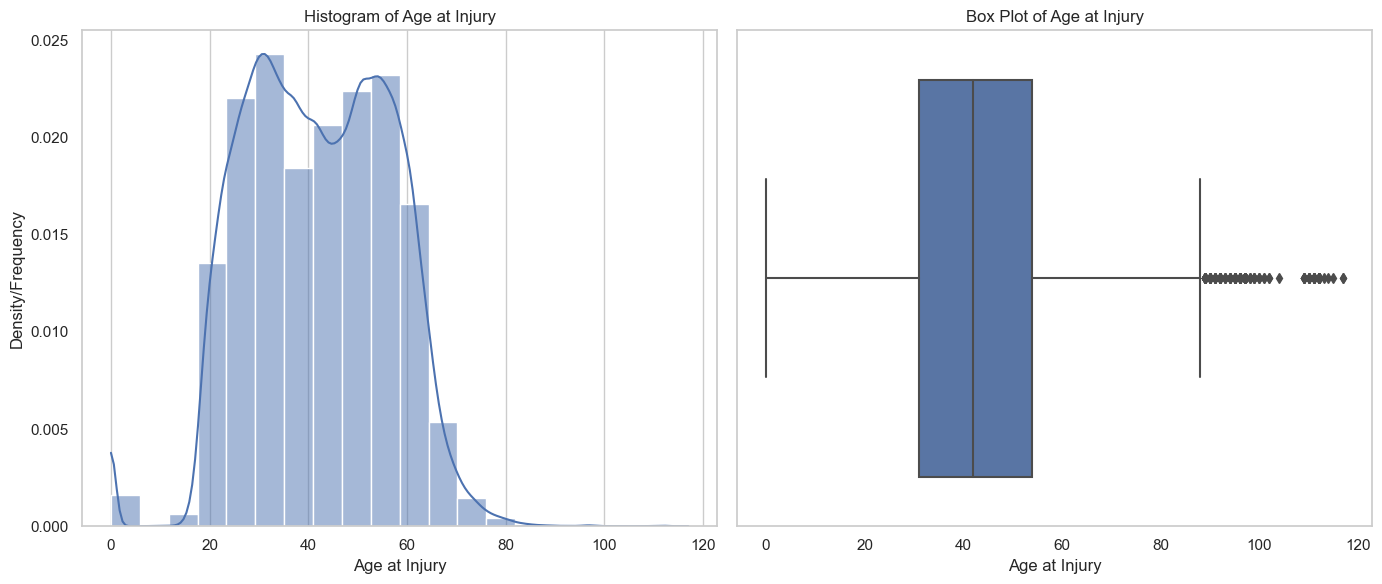

In [741]:
# Clean the 'Age at Injury' data
age_at_injury_cleaned = df['Age at Injury'].dropna().astype(float)

# Create a figure and set of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram on the first subplot
sns.histplot(age_at_injury_cleaned, bins=20, kde=True, ax=axs[0], stat='density', alpha=0.5)
axs[0].set_title('Histogram of Age at Injury')
axs[0].set_xlabel('Age at Injury')
axs[0].set_ylabel('Density/Frequency')
axs[0].grid(axis='y')

# Create a box plot on the second subplot
sns.boxplot(x=age_at_injury_cleaned, ax=axs[1])
axs[1].set_title('Box Plot of Age at Injury')
axs[1].set_xlabel('Age at Injury')
axs[1].grid(axis='x')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [742]:
(df['Age at Injury'] == 0).sum()

5464

##### We have a large number of ages at injury recorded as zero, which suggests that this is not a random error but rather that these values likely represent NaN.

In [743]:
df['Age at Injury'] = df['Age at Injury'].replace(0, np.nan)

##### We also see that there are many outliers. Let's remove the rows that contain values below 14 and above 75 years, as these are the legal ages to work in the United States. Therefore, these rows maybe contain errors in other columns, so it is better to eliminate them.

In [744]:
df = df.drop(df[(df['Age at Injury'] < 14) | (df['Age at Injury'] > 75)].index)

In [745]:
df.shape

(571572, 31)

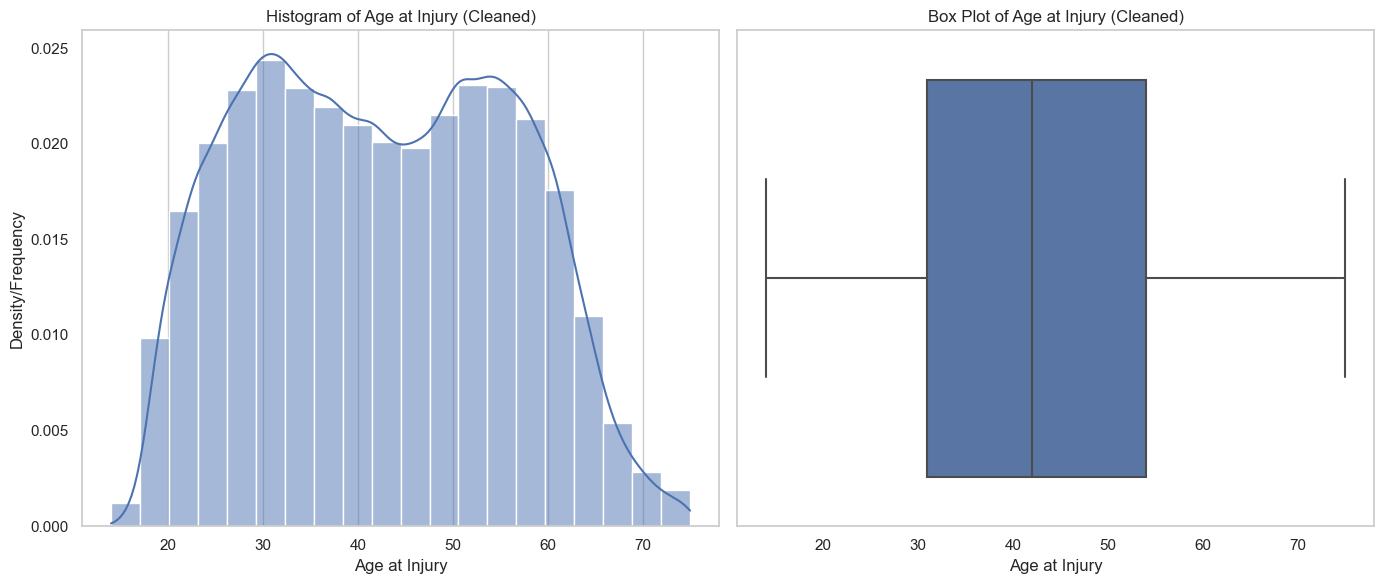

In [746]:
# Clean the 'Age at Injury' data again after removing outliers
age_at_injury_cleaned_final = df['Age at Injury'].dropna().astype(float)

# Create a figure and set of subplots for final visualizations
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram on the first subplot
sns.histplot(age_at_injury_cleaned_final, bins=20, kde=True, ax=axs[0], stat='density', alpha=0.5)
axs[0].set_title('Histogram of Age at Injury (Cleaned)')
axs[0].set_xlabel('Age at Injury')
axs[0].set_ylabel('Density/Frequency')
axs[0].grid(axis='y')

# Create a boxplot on the second subplot
sns.boxplot(x=age_at_injury_cleaned_final, ax=axs[1])
axs[1].set_title('Box Plot of Age at Injury (Cleaned)')
axs[1].set_xlabel('Age at Injury')
axs[1].grid(axis='x')

# Adjust layout
plt.tight_layout()
plt.show()

####  Alternative Dispute Resolution

In [747]:
df['Alternative Dispute Resolution'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [748]:
df['Alternative Dispute Resolution'].value_counts()

N    568959
Y      2608
U         5
Name: Alternative Dispute Resolution, dtype: int64

#### The 5 cases recorded with 'U' should be an error. They are likely meant to be 'Y', since the Y and U keys are located next to each other. In fact, the 'Alternative Dispute Resolution' variable should be a boolean. Since 5 cases represent a minority in the data and contain errors, we can safely remove these rows.

In [749]:
df = df.drop(df[df['Alternative Dispute Resolution'] == 'U'].index)

df['Alternative Dispute Resolution'].unique()

array(['N', 'Y'], dtype=object)

In [750]:
# Replace 'Y' with True, 'N' with False, and preserve NaNs
df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].replace({'Y': True, 'N': False})

# Now convert to nullable boolean type
df['Alternative Dispute Resolution'] = df['Alternative Dispute Resolution'].astype("boolean")

In [751]:
df.shape

(571567, 31)

#### Attorney/Representative

In [752]:
df['Attorney/Representative'].unique()

# It seems fine.

array(['N', 'Y'], dtype=object)

In [753]:
# Replace 'Y' with True, 'N' with False, and preserve NaNs
df['Attorney/Representative'] = df['Attorney/Representative'].replace({'Y': True, 'N': False})

# Now convert to nullable boolean type
df['Attorney/Representative'] = df['Attorney/Representative'].astype("boolean")

#### Agreement Reached

In [754]:
df['Agreement Reached'].unique()

array([0., 1.])

In [755]:
df['Agreement Reached'].value_counts()

0.0    544938
1.0     26629
Name: Agreement Reached, dtype: int64

In [756]:
df['Agreement Reached'] = df['Agreement Reached'].replace({'1.0': True, '0.0': False})

# Now convert to nullable boolean type
df['Agreement Reached'] = df['Agreement Reached'].astype("boolean")

#### COVID-19 Indicator

In [757]:
df['COVID-19 Indicator'].unique()

array(['N', 'Y'], dtype=object)

In [758]:
df['COVID-19 Indicator'].value_counts()

N    544131
Y     27436
Name: COVID-19 Indicator, dtype: int64

In [759]:
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].replace({'Y': True, 'N': False})

# Now convert to nullable boolean type
df['COVID-19 Indicator'] = df['COVID-19 Indicator'].astype("boolean")

In [760]:
df.shape

(571567, 31)

### Let's check all dtypes

In [761]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571567 entries, 0 to 593467
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      567878 non-null  datetime64[ns]
 1   Age at Injury                      566103 non-null  Int64         
 2   Alternative Dispute Resolution     571567 non-null  boolean       
 3   Assembly Date                      571567 non-null  datetime64[ns]
 4   Attorney/Representative            571567 non-null  boolean       
 5   Average Weekly Wage                543021 non-null  float64       
 6   Birth Year                         542612 non-null  Int64         
 7   C-2 Date                           557036 non-null  datetime64[ns]
 8   C-3 Date                           186624 non-null  datetime64[ns]
 9   Carrier Name                       571567 non-null  object        
 10  Carrier Type        

### Now, all dtypes are fixed!

#### Average Weekly Wage 

In [762]:
df['Average Weekly Wage'].unique()

array([   0.  , 1745.93, 1434.8 , ...,  371.02, 2277.28, 1008.86])

In [763]:
df['Average Weekly Wage'].shape

(571567,)

In [764]:
(df['Average Weekly Wage'] == 0).sum()

333933

#####  It is not possible to have values in 'Average Weekly Wage' recorded as zero since we are talking about workers. Since there are 333933 values recorded as zero, it is very unlikely that this is an error. We should replace the zeros with NaN values.

In [765]:
df['Average Weekly Wage'] = df['Average Weekly Wage'].replace(0, np.nan)

In [767]:
df['Average Weekly Wage'].isna().sum()

362479

In [769]:
(362479/571567)*100

63.41846187761014

#### More than 60% of the Average Weekly Wage column has unknown information. This gonna produce issues in analysis and modeling. Replacing those missing values with statistical measures like the mean or median can skew results and introduce bias, especially if the data is not missing at random. Using methods like KNN can also lead to unreliable estimates if the underlying distribution is not well understood.
#### Given these circumstances, removing the column might be the most prudent approach.

#### Let's explore the variable anyway

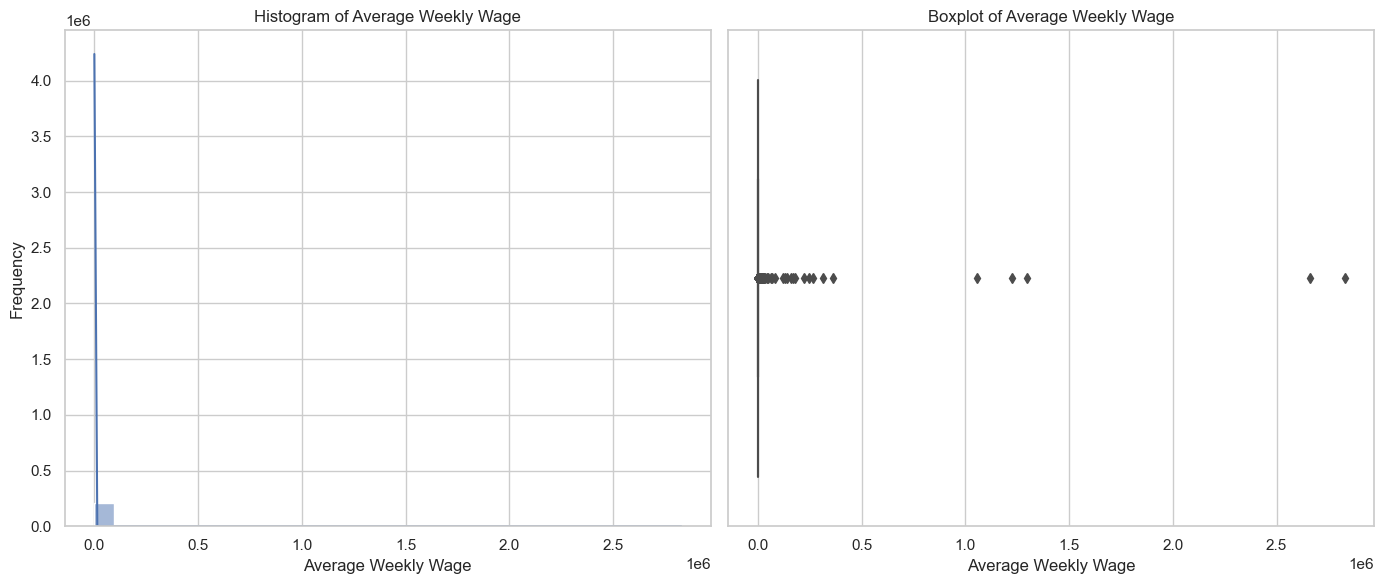

In [770]:
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Average Weekly Wage'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Histogram of Average Weekly Wage')
axs[0].set_xlabel('Average Weekly Wage')
axs[0].set_ylabel('Frequency')

sns.boxplot(x=df['Average Weekly Wage'], ax=axs[1])
axs[1].set_title('Boxplot of Average Weekly Wage')
axs[1].set_xlabel('Average Weekly Wage')

plt.tight_layout()
plt.show()

##### It is obvious that we have many outliers here that likely represent errors. We will need to eliminate the extremes. Let's simulate the outlier and NaN removal.

In [772]:
# Create a new DataFrame without NaN values in 'Average Weekly Wage'
average_weekly_wage_cleaned = df[['Average Weekly Wage']].dropna()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the cleaned data
Q1 = average_weekly_wage_cleaned['Average Weekly Wage'].quantile(0.25)
Q3 = average_weekly_wage_cleaned['Average Weekly Wage'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the total number of data points before removing outliers
total_count_before_removal = len(average_weekly_wage_cleaned)

# Filter the data to remove outliers based on the calculated bounds
average_weekly_wage_cleaned = average_weekly_wage_cleaned[
    (average_weekly_wage_cleaned['Average Weekly Wage'] >= lower_bound) & 
    (average_weekly_wage_cleaned['Average Weekly Wage'] <= upper_bound)
]

# Count the total number of data points after removing outliers
total_count_after_removal = len(average_weekly_wage_cleaned)

# Calculate the number of data points removed
removed_count = total_count_before_removal - total_count_after_removal

# Calculate the percentage of data removed
percentage_removed = (removed_count / total_count_before_removal) * 100

# Display the result
print(f"Percentage of data removed: {percentage_removed:.2f}%")

Percentage of data removed: 2.86%


In [773]:
df.shape

(571567, 31)

#### Since only 2.86% of the data is eliminated by the quartile method, we can remove these rows from the DataFrame.

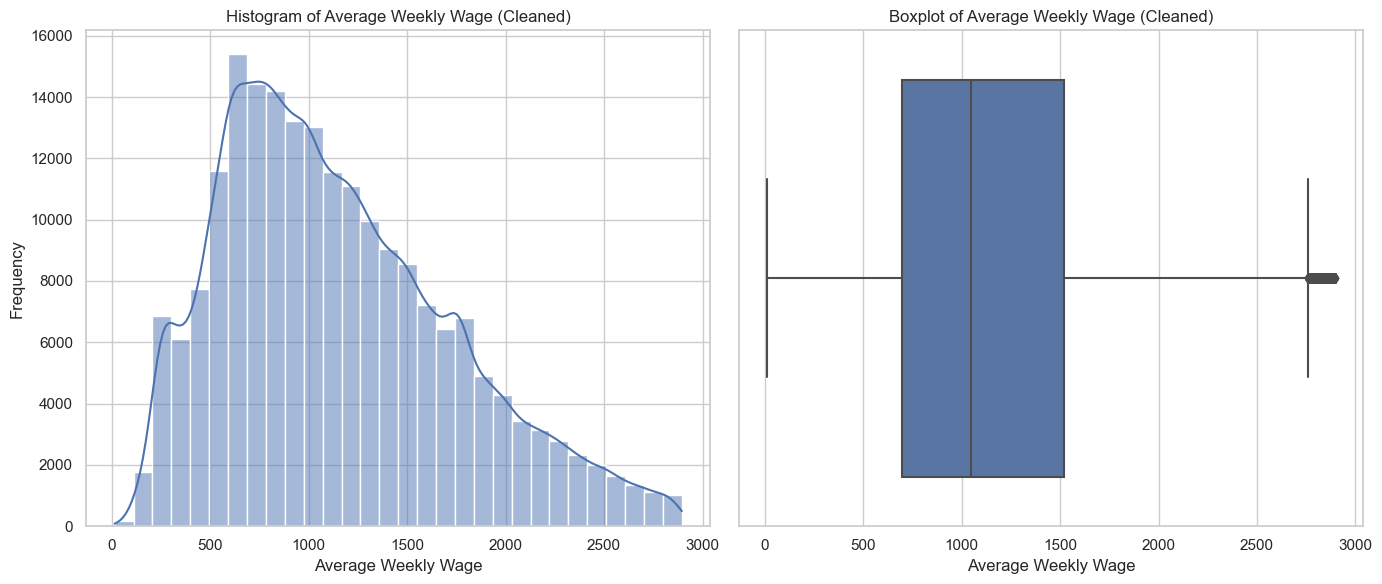

In [774]:
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
sns.histplot(average_weekly_wage_cleaned['Average Weekly Wage'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Histogram of Average Weekly Wage (Cleaned)')
axs[0].set_xlabel('Average Weekly Wage')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=average_weekly_wage_cleaned['Average Weekly Wage'], ax=axs[1])
axs[1].set_title('Boxplot of Average Weekly Wage (Cleaned)')
axs[1].set_xlabel('Average Weekly Wage')

# Show the plots
plt.tight_layout()
plt.show()

#### Since average weekly wage is a numerical variable, we can use the KNN method to replace the NaN values, but was taking to long! So we're using mean or median to replace NaN values.

In [776]:
# Initialize the KNN imputer
# imputer = KNNImputer(n_neighbors=5)

# Fill NaN values in 'Average Weekly Wage' directly in df
# df['Average Weekly Wage'] = imputer.fit_transform(df[['Average Weekly Wage']])

Initial Mean (with NaN): 1277.6471417776245
Initial Median (with NaN): 1070.87
Final Mean (after NaN and outlier removal): 1148.2842650628513
Final Median (after NaN and outlier removal): 1046.75


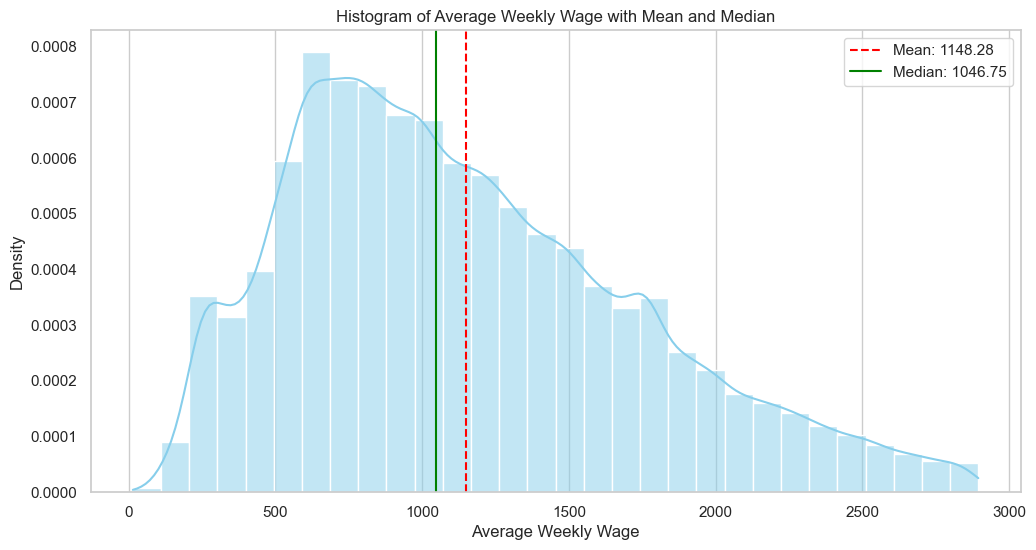

In [777]:
# Remove NaN values
df_cleaned = df['Average Weekly Wage'].dropna()

# Calculate initial mean and median
initial_mean = df['Average Weekly Wage'].mean()
initial_median = df['Average Weekly Wage'].median()
print("Initial Mean (with NaN):", initial_mean)
print("Initial Median (with NaN):", initial_median)

# Calculate Q1, Q3, and IQR
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df_cleaned = df_cleaned[(df_cleaned >= Q1 - 1.5 * IQR) & (df_cleaned <= Q3 + 1.5 * IQR)]

# Calculate final mean and median after cleaning
final_mean = df_cleaned.mean()
final_median = df_cleaned.median()
print("Final Mean (after NaN and outlier removal):", final_mean)
print("Final Median (after NaN and outlier removal):", final_median)

# Final Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned, bins=30, kde=True, color='skyblue', stat='density', alpha=0.5)

# Plot mean and median lines
plt.axvline(final_mean, color='red', linestyle='--', label=f'Mean: {final_mean:.2f}')
plt.axvline(final_median, color='green', linestyle='-', label=f'Median: {final_median:.2f}')

# Customize the plot
plt.title('Histogram of Average Weekly Wage with Mean and Median')
plt.xlabel('Average Weekly Wage')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y')

# Show the plot
plt.show()

#### We see that the median is closer to the largest volume of data, so we use the median to replace the NaN values in the original DataFrame 

In [778]:
df.shape

(571567, 31)

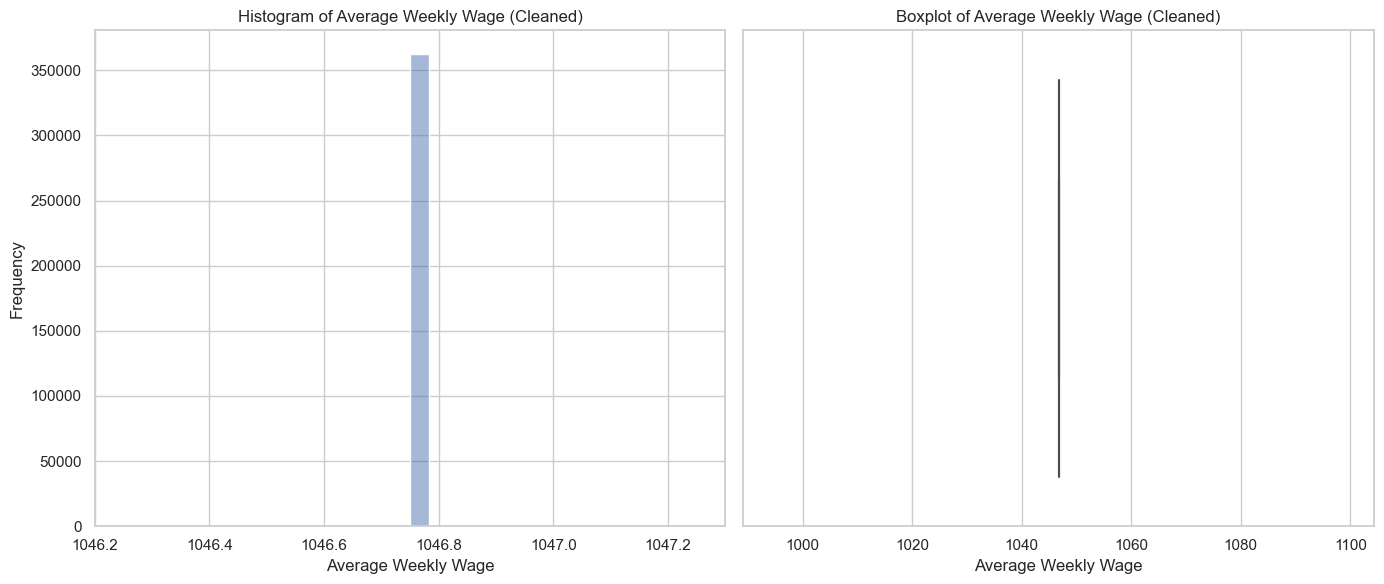

In [782]:
# 1. Substituir zeros por NaN em 'Average Weekly Wage'
df['Average Weekly Wage'] = df['Average Weekly Wage'].replace(0, np.nan)

# 2. Substituir valores NaN pela média
mean_value = df['Average Weekly Wage'].mean()
df['Average Weekly Wage'].fillna(mean_value, inplace=True)

# 3. Calcular Q1, Q3 e IQR para remover outliers
Q1 = df['Average Weekly Wage'].quantile(0.25)
Q3 = df['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1

# 4. Definir os limites para remoção de outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 5. Remover outliers
df_cleaned = df[(df['Average Weekly Wage'] >= lower_bound) & (df['Average Weekly Wage'] <= upper_bound)]

# 6. Visualizar os dados após limpeza
sns.set(style="whitegrid")

# Criar uma figura com dois subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Histograma
sns.histplot(df_cleaned['Average Weekly Wage'], bins=30, kde=True, ax=axs[0])
axs[0].set_title('Histogram of Average Weekly Wage (Cleaned)')
axs[0].set_xlabel('Average Weekly Wage')
axs[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df_cleaned['Average Weekly Wage'], ax=axs[1])
axs[1].set_title('Boxplot of Average Weekly Wage (Cleaned)')
axs[1].set_xlabel('Average Weekly Wage')

# Ajustar layout
plt.tight_layout()
plt.show()

#### As expected, most of the data now has the same value, which won't be useful for analysis. Let's remove the column.

In [783]:
# Drop the 'Average Weekly Wage' column
df = df.drop(columns=['Average Weekly Wage'])

#### Carrier Name

In [785]:
df['Carrier Name'].unique()

array(['NEW HAMPSHIRE INSURANCE CO', 'ZURICH AMERICAN INSURANCE CO',
       'INDEMNITY INSURANCE CO OF', ..., 'MARATHON CENTRAL SCHOOL DIST',
       'CAMBRIDGE CENTRAL SCHOOL', 'HERMON-DEKALB CENTRAL'], dtype=object)

In [786]:
# Count the number of unique carrier names
df['Carrier Name'].nunique()

2039

In [787]:
df['Carrier Name'].isna().sum()

0

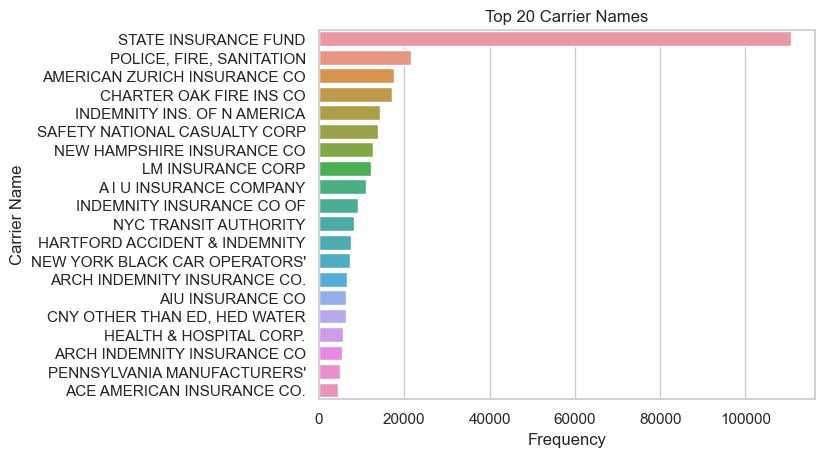

In [788]:
# Plot the top 20 most frequent carrier names
top_carriers = df['Carrier Name'].value_counts().nlargest(20)
sns.barplot(x=top_carriers.values, y=top_carriers.index)
plt.title('Top 20 Carrier Names')
plt.xlabel('Frequency')
plt.ylabel('Carrier Name')
plt.show()

In [789]:
# Display the counts and unique values of the carrier names
df['Carrier Name'].describe()

count                   571567
unique                    2039
top       STATE INSURANCE FUND
freq                    110774
Name: Carrier Name, dtype: object

#### Claim Identifier

In [790]:
df['Claim Identifier'].isna().sum()

0

In [791]:
df['Claim Identifier']

0         5393875
1         5393091
2         5393889
4         5393887
5         5393863
           ...   
593451    6165265
593455    6165285
593456    6165506
593457    6165339
593467    6165075
Name: Claim Identifier, Length: 571567, dtype: int64

In [792]:
df['Claim Identifier'].unique()

array([5393875, 5393091, 5393889, ..., 6165506, 6165339, 6165075],
      dtype=int64)

In [793]:
(df['Claim Identifier'] == 0).sum()  # It's seems all okay. Ther is nothing to do with this variable.

0

#### District Name

In [794]:
df['District Name'].isna().sum()

0

In [795]:
df['District Name'].unique()

array(['SYRACUSE', 'ROCHESTER', 'ALBANY', 'HAUPPAUGE', 'NYC', 'BUFFALO',
       'BINGHAMTON', 'STATEWIDE'], dtype=object)

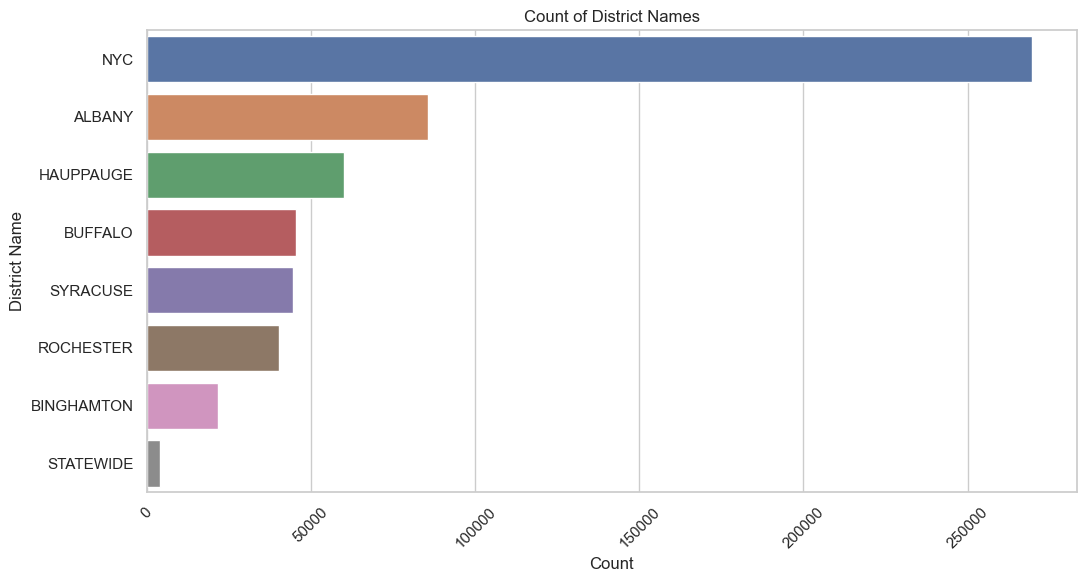

In [796]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a count plot for 'District Name'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='District Name', order=df['District Name'].value_counts().index)
plt.title('Count of District Names')
plt.xlabel('Count')
plt.ylabel('District Name')
plt.xticks(rotation=45)  # Rotate x labels if needed
plt.show()

#### IME-4 Count

In [797]:
# Number of IME-4 forms received per claim. The IME-4 form is
# the “Independent Examiner's Report of Independent Medical
# Examination” form.

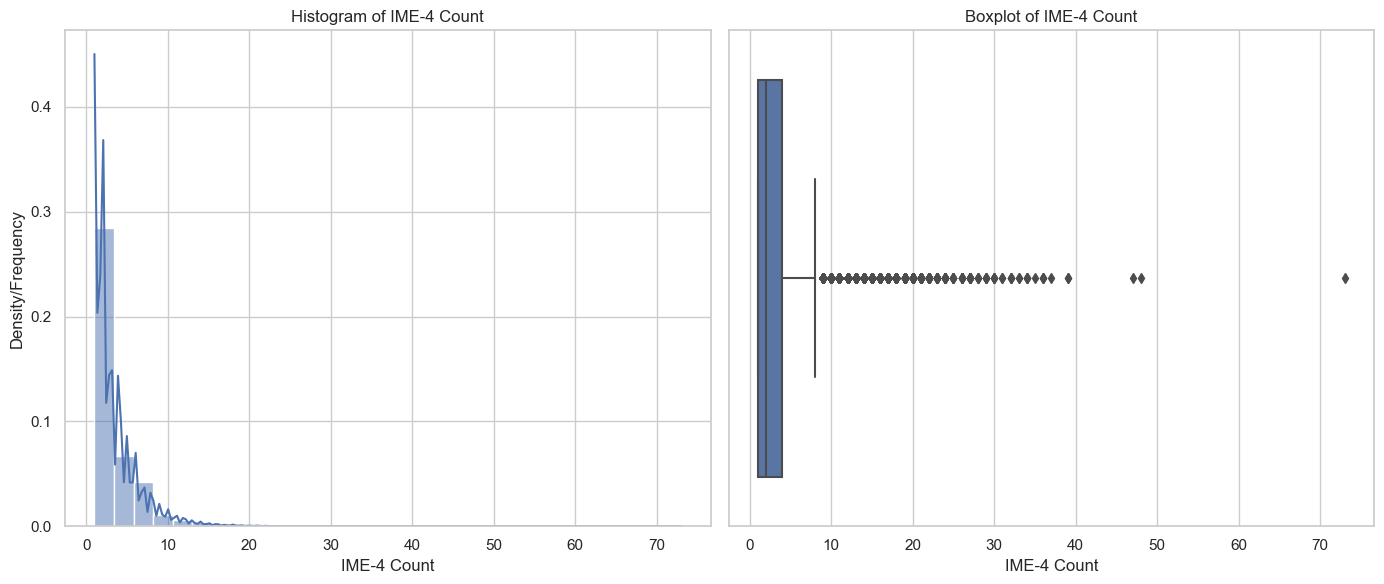

In [798]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram for 'IME-4 Count'
sns.histplot(df['IME-4 Count'], bins=30, kde=True, ax=axs[0], stat='density', alpha=0.5)
axs[0].set_title('Histogram of IME-4 Count')
axs[0].set_xlabel('IME-4 Count')
axs[0].set_ylabel('Density/Frequency')

# Create a boxplot for 'IME-4 Count'
sns.boxplot(x=df['IME-4 Count'], ax=axs[1],)
axs[1].set_title('Boxplot of IME-4 Count')
axs[1].set_xlabel('IME-4 Count')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [799]:
df['IME-4 Count'].isna().sum()

439294

In [800]:
df.shape

(571567, 30)

In [817]:
(439294/571567)*100

76.85783119039414

#### With ~77% of the IME-4 Count column values missing maybe does not make sense to retain the column in our analysis.

#### But let's analyse it anyway

#### Since the IME-4 count must be represented by an integer, it doesn't make sense to replace the NaN values with the mean, median, or use the KNN method. Therefore, we are left with only using the mode

In [818]:
# Calculate the mode of the 'IME-4 Count' column
mode_value = df['IME-4 Count'].mode()[0]

# Fill NaN values with the mode
df['IME-4 Count'].fillna(mode_value, inplace=True)

# Check if NaN values have been filled
df['IME-4 Count'].isna().sum()

0

In [819]:
df['IME-4 Count'].unique()

array([ 1.,  4.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11., 13.,
       14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26., 21.,
       23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31., 35.,
       33., 73.])

In [820]:
(df['IME-4 Count'] == 0).sum()

0

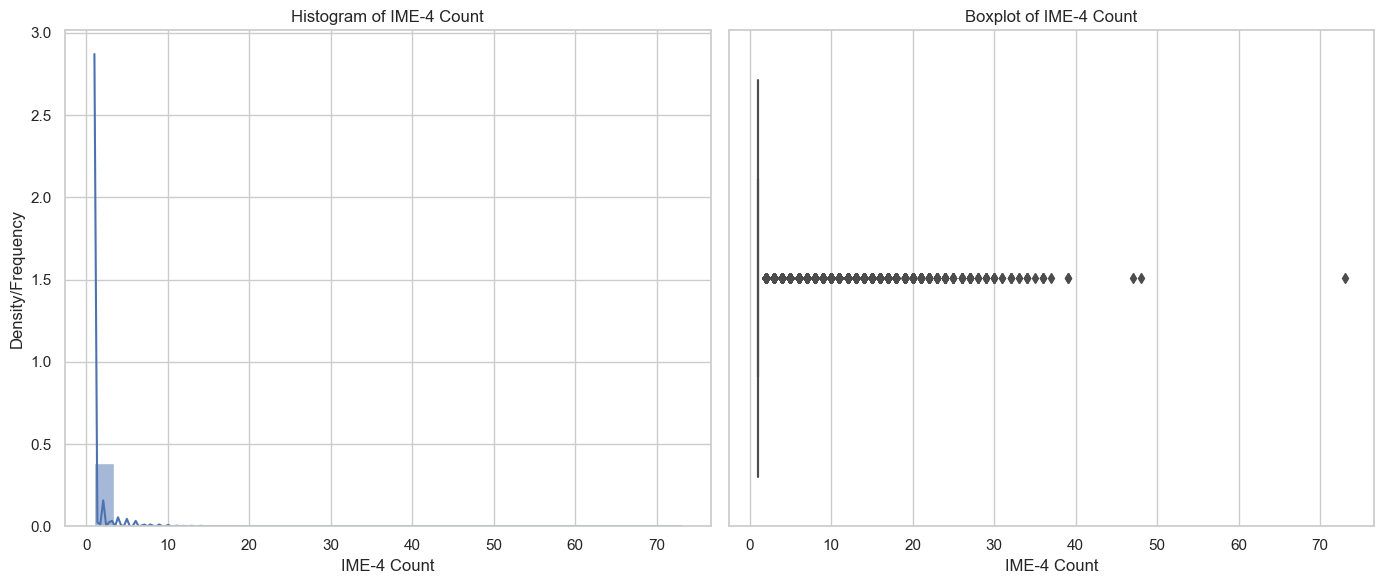

In [826]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Create a histogram for 'IME-4 Count'
sns.histplot(df['IME-4 Count'], bins=30, kde=True, ax=axs[0], stat='density', alpha=0.5)
axs[0].set_title('Histogram of IME-4 Count')
axs[0].set_xlabel('IME-4 Count')
axs[0].set_ylabel('Density/Frequency')

# Create a boxplot for 'IME-4 Count'
sns.boxplot(x=df['IME-4 Count'], ax=axs[1],)
axs[1].set_title('Boxplot of IME-4 Count')
axs[1].set_xlabel('IME-4 Count')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

#### Having more than 10 filled IME-4 forms per claim does raise some concerns and could indicate potential errors or unusual circumstances.

In [827]:
df[df['IME-4 Count'] > 10]['IME-4 Count'].count()

3786

In [828]:
high_submission_claims = df[df['IME-4 Count'] > 10]
print(high_submission_claims)

       Accident Date  Age at Injury  Alternative Dispute Resolution  \
269       2019-12-22             22                           False   
441       2019-12-10             49                           False   
452       2019-12-20             50                           False   
460       2019-12-31             56                           False   
741       2019-12-20             39                           False   
...              ...            ...                             ...   
586436    2022-12-04             29                           False   
588215    2022-12-16             49                           False   
590144    2022-12-21             65                           False   
590615    2022-12-21             30                           False   
592972    2022-12-16             30                           False   

       Assembly Date  Attorney/Representative  Birth Year   C-2 Date  \
269       2020-01-02                     True        1997 2020-01-02   
441

In [829]:
# Display the first few rows of high submission claims
high_submission_claims

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
269,2019-12-22,22,False,2020-01-02,True,1997,2020-01-02,NaT,AMERICAN ZURICH INSURANCE CO,1A. PRIVATE,...,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",16.0,DISLOCATION,53.0,KNEE,11210,True,2.0
441,2019-12-10,49,False,2020-01-02,True,1970,2020-05-29,2019-12-23,EVEREST NATIONAL INSURANCE CO.,1A. PRIVATE,...,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,11208,False,1.0
452,2019-12-20,50,False,2020-01-02,True,0,2020-01-02,NaT,MANUFACTURERS ALLIANCE,1A. PRIVATE,...,I,56.0,LIFTING,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,12419,True,0.0
460,2019-12-31,56,False,2020-01-02,True,1964,2020-01-02,NaT,STATE INSURANCE FUND,2A. SIF,...,I,29.0,ON SAME LEVEL,28.0,FRACTURE,55.0,ANKLE,12458,False,1.0
741,2019-12-20,39,False,2020-01-03,True,1980,2020-01-03,2020-01-24,HARTFORD ACCIDENT & INDEMNITY,1A. PRIVATE,...,IV,45.0,COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE,52.0,STRAIN OR TEAR,42.0,LOWER BACK AREA,10460,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586436,2022-12-04,29,False,2022-12-16,True,1993,2022-12-16,NaT,NEW JERSEY MANUFACTURERS,1A. PRIVATE,...,IV,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,18.0,SOFT TISSUE,10468,False,5.0
588215,2022-12-16,49,False,2022-12-20,True,1973,2022-12-20,2023-03-31,STATE INSURANCE FUND,2A. SIF,...,IV,74.0,"FELLOW WORKER, PATIENT OR OTHER PERSON",10.0,CONTUSION,-9.0,MULTIPLE,11413,False,3.0
590144,2022-12-21,65,False,2022-12-23,True,1957,2022-12-23,2023-01-23,NYC TRANSIT AUTHORITY,3A. SELF PUBLIC,...,IV,33.0,ON STAIRS,10.0,CONTUSION,18.0,SOFT TISSUE,10031,False,1.0
590615,2022-12-21,30,False,2022-12-26,True,0,2022-12-24,2022-12-28,STARR INDEMNITY & LIABILITY,1A. PRIVATE,...,UK,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),18101,False,0.0


#### Appears that:

- Alternative Dispute Resolution: The mayjor of the claims have a value of False for the Alternative Dispute Resolution field. This indicates that none of these claims have utilized any alternative methods to resolve the disputes. This might suggest a tendency towards litigation or other formal processes rather than reaching settlements or agreements outside the courtroom.
- Attorney Representation: The mayjor of the claims have True in the Attorney/Representative field, indicating that all individuals involved in these cases have legal representation. This may suggest that the complexity or severity of these cases warranted the involvement of attorneys.

In [830]:
filtered_df = df[df['IME-4 Count'] > 10]

adr_counts = filtered_df['Alternative Dispute Resolution'].value_counts().rename_axis('ADR').reset_index(name='ADR Count')

attorney_counts = filtered_df['Attorney/Representative'].value_counts().rename_axis('Attorney').reset_index(name='Attorney Count')

result_df = pd.merge(adr_counts, attorney_counts, left_on='ADR', right_on='Attorney', how='outer')

result_df

,ADR,ADR Count,Attorney,Attorney Count
0,False,3786,False,22
1,<NA>,<NA>,True,3764


- The absence of ADR in the majority of cases coupled with the high percentage of cases with attorney representation suggests that these cases may involve intricate legal matters that require formal adjudication rather than informal resolution methods.
- This could indicate a trend where claimants opt for legal counsel to ensure their interests are adequately represented, especially when they perceive the claims to be more complicated or when the potential outcomes carry significant implications.
- The overall situation might reflect a judicial landscape where claimants feel the need to prepare thoroughly for potential litigation rather than resolving disputes outside the courtroom.
- In conclusion, while the numbers don't necessarily indicate errors, they do highlight a pattern of complexity in the cases being analyzed, warranting further investigation into the nature and outcomes of these claims.

In [ ]:
# Filter only the cases with more than 10 IME-4 forms
high_ime4_cases = df[df['IME-4 Count'] > 10]

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.countplot(data=high_ime4_cases, x='IME-4 Count')

# Set up the plot labels
plt.title('Count of Cases with More than 10 IME-4 Forms', fontsize=16)
plt.xlabel('Number of IME-4 Forms', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()

In [ ]:
df.info()

In [822]:
# Separate metric features
metric_features = df.select_dtypes(include=['float64', 'int64', 'Int64'])

# Separate non-metric features
non_metric_features = df.select_dtypes(exclude=['float64', 'int64', 'Int64'])

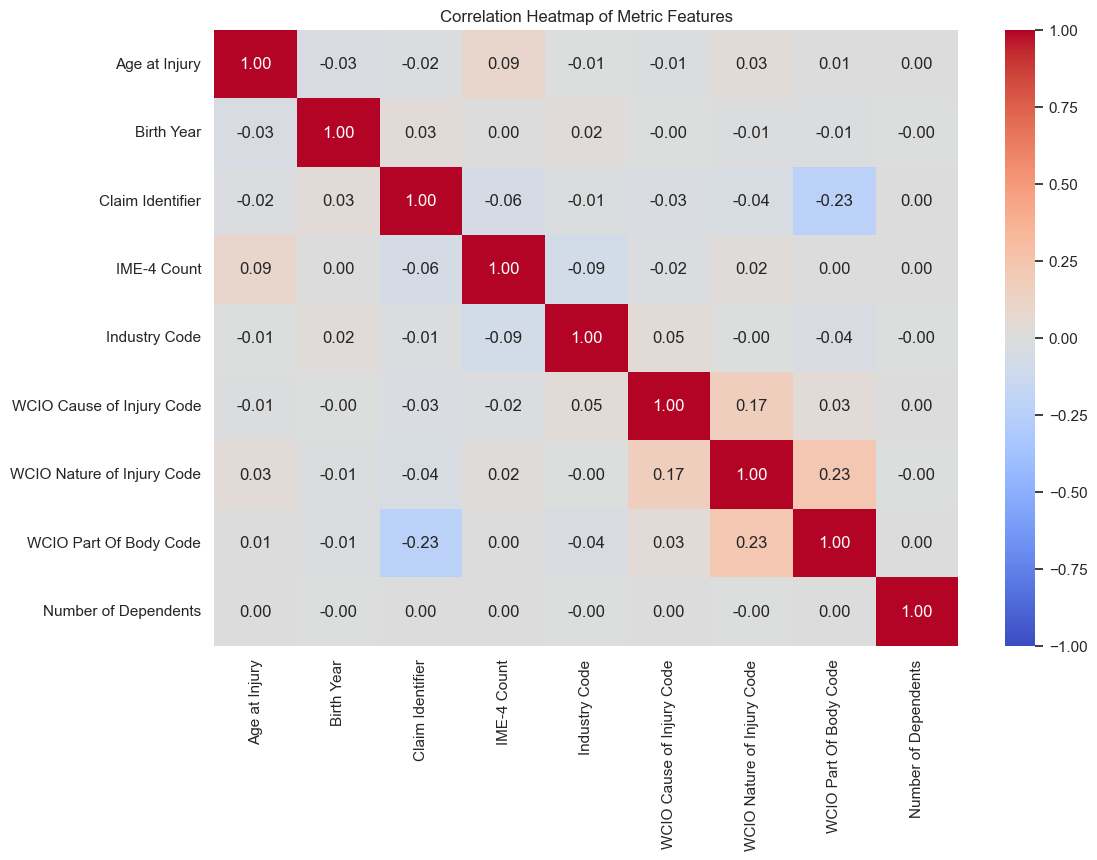

In [823]:
# Select only the numeric (int and float) columns, excluding boolean types
metric_features = df.select_dtypes(include=['float64', 'int64', 'Int64']).copy()

# Calculate the correlation matrix for only metric features
correlation_matrix = metric_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Metric Features')
plt.show()


#### Didn't find any correlation with other variables. 

#### Number of Dependents

In [824]:
df['Number of Dependents'].isna().sum()

0

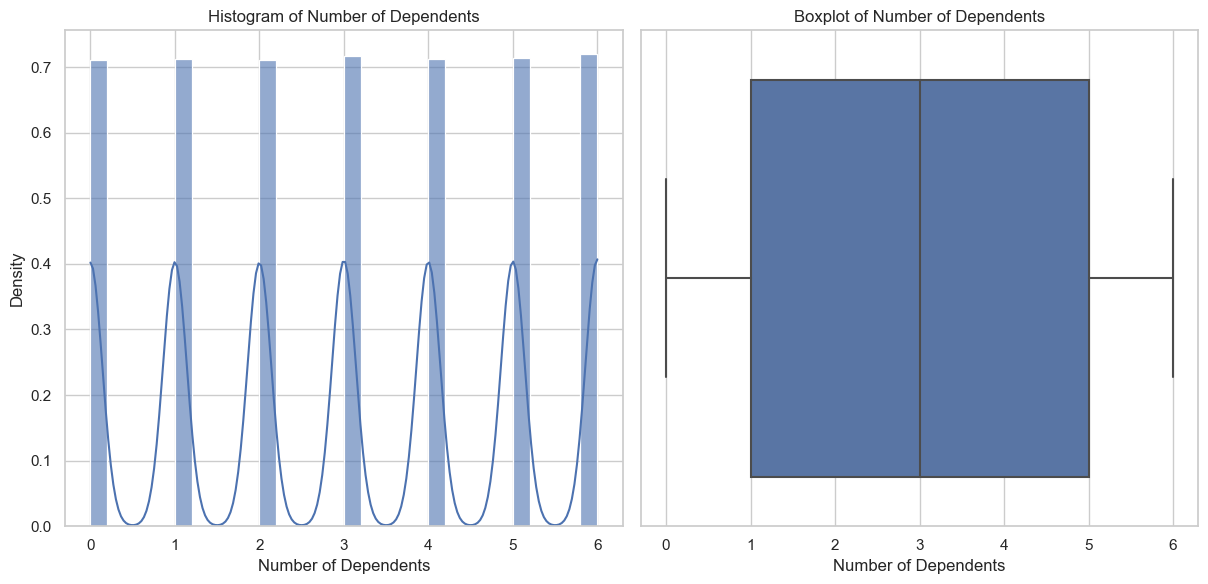

In [825]:
# Convert 'Number of Dependents' to float type
df['Number of Dependents'] = df['Number of Dependents'].astype(float)

# Drop any NaN values if they exist after conversion
df = df.dropna(subset=['Number of Dependents'])

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Histogram
plt.subplot(1, 3, 1)  # 1 row, 3 columns, first subplot
sns.histplot(df['Number of Dependents'], bins=30, kde=True, stat='density', alpha=0.6)
plt.title('Histogram of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Density')

# Boxplot
plt.subplot(1, 3, 2)  # 1 row, 3 columns, second subplot
sns.boxplot(x=df['Number of Dependents'])
plt.title('Boxplot of Number of Dependents')
plt.xlabel('Number of Dependents')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


## Check Duplicates

In [816]:
# Check for duplicates and return a boolean value
has_duplicates = df.duplicated().any()
print(f"Existence of duplicates: {has_duplicates}")

Existence of duplicates: False
